Objective:
    
    ->Dataset from kaggle contains images, each image is of size 28*28 pixels
    
    ->Each image is of 784 dimesnions 
    
    ->Reducing the dimensionality by using dimensionality reduction techniques like PCA,t-SNE
    

In [3]:
#MNIST dataset from kaggle

#Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as mp

loading the data

In [4]:
data = pd.read_csv("train.csv")

Analyzing the data features

In [5]:
print(data.shape)
print(data.columns)
print(data.ndim)
print(data.head(5))

(42000, 785)
Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)
2
   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...

Observations:
    
    ->The dataset contains of 42000 images each of 784 dimesnions
    
    ->Label is the class type to which the image belongs to
    
    ->So we have to seperate the label data and continue with the process

Taking the label from the data frame and removing the label feature from the dataframe

In [8]:
l = data['label']
data = data.drop('label',axis=1)
print(l.shape)
print(data.shape)

(42000,)
(42000, 784)


->To plot the image we have to convert the datapoint which is an array from 1-d to 2-d

->At the same time we can check with the label for accuracy

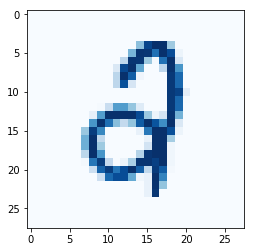

2


In [10]:
index = 10000
grid_data = data.iloc[index].as_matrix().reshape(28,28)
mp.imshow(grid_data,interpolation='none',cmap='Blues')
mp.show()
print(l[index])

2D Visualization using PCA without Scikit-Learn

->Keeping in consideration about the RAM and time efficiency, taking the subset of data

In [11]:
label = l.head(20000)
dataframe = data.head(20000)
print(label.shape)
print(dataframe.shape)
print(l.shape)
print(data.shape)

(20000,)
(20000, 784)
(42000,)
(42000, 784)


Note:
    
    ->Using sklearn is a simple process, but without sklearn we need to process bunch of steps:
        
        ->Data-preprocessing-Standardizing of data is mandatory(mean=0 and variance=1)
        
        ->Computing the co-variance matrix 
        
        ->Generating the top two eigen vectors to plot on the 2-dimension plane,this can be done 
          using eigh from scipy.linalg
        
        ->This will return the eigen values in the ascending order, Since we are doing on 2-d we 
          can take top two values
        

In [12]:
from sklearn.preprocessing import StandardScaler
standarad_data = StandardScaler().fit_transform(dataframe)
print(standarad_data.shape)

(20000, 784)


In [13]:
standarad_data_1 = standarad_data
co_var_matrix = np.matmul(standarad_data_1.T,standarad_data_1)
print(co_var_matrix.shape)

(784, 784)


In [17]:
from scipy.linalg import eigh
value,vector = eigh(co_var_matrix,eigvals=(782,783))
vector = vector.T
new_cord = np.matmul(vector,standarad_data_1.T)
print(vector.shape)
print(standarad_data_1.T.shape)

(2, 784)
(784, 20000)


In [15]:
new_cord.shape

(2, 20000)

Appending the label data to plot

In [18]:
new_cord = np.vstack((new_cord,label)).T

(20000, 3)
    1st-dim    2nd-dim  label
0  5.430697   5.060862    1.0
1 -6.242999 -19.293148    0.0
2  1.828611   7.684498    1.0
3 -5.585495   0.440132    4.0
4 -6.333250 -26.597773    0.0
5  0.659000  -1.280238    0.0


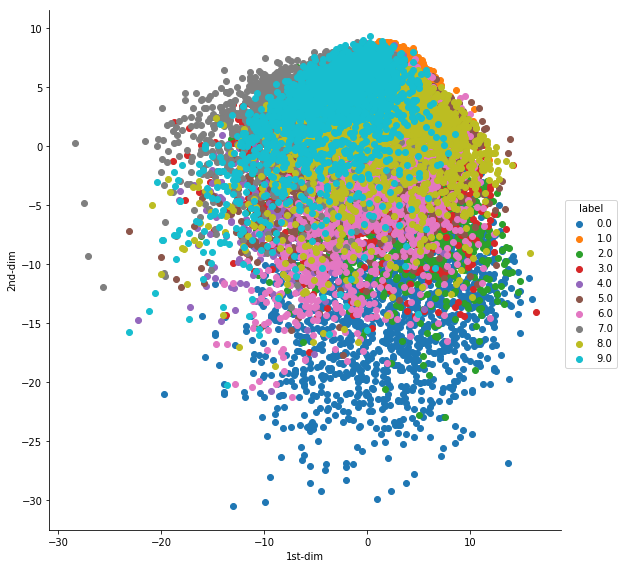

In [21]:
df = pd.DataFrame(data=new_cord,columns=('1st-dim','2nd-dim','label'))
print(df.shape)
print(df.head(6))
import seaborn as s
s.FacetGrid(df,hue='label',size=8).map(mp.scatter,'1st-dim','2nd-dim').add_legend()
mp.show()

PCA Using Scikit-Learn

-> It becomes very easy when using Scikit-Learn library

  ->We just need to inform the number of dimesnions and then we need to add the labels to the data
    
  ->Should create a dataframe to plot as just as we done on above

In [23]:
from sklearn import decomposition
pca = decomposition.PCA()
pca.n_components=2
pca_data = pca.fit_transform(standarad_data_1)
print(standarad_data_1.shape)
pca_data = np.vstack((pca_data.T,label)).T
print(pca_data.shape)

(20000, 784)
(20000, 3)


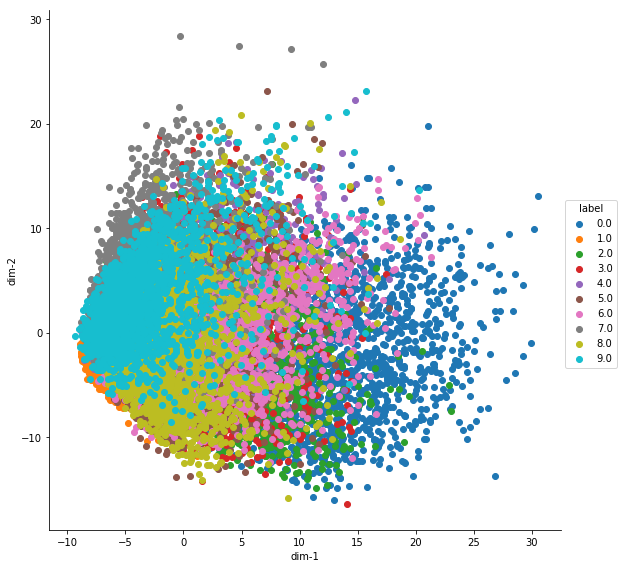

In [24]:
pca_data_df = pd.DataFrame(data=pca_data,columns=('dim-1','dim-2','label'))
s.FacetGrid(pca_data_df,hue='label',size=8).map(mp.scatter,'dim-1','dim-2').add_legend()
mp.show()

Note:
    
    ->We can use PCA not only for dimensionality reduction but also for picking the most useful dimensions 
    
    ->When the dimension were 2 or 3 then it is for visualization
    
    ->Based on the application we can reduce our dimensions

Text(0,0.5,'Cumulative_variance')

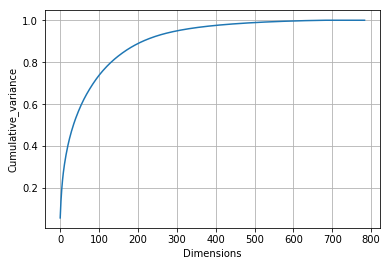

In [26]:
pca.n_components = 784
pca_data = pca.fit_transform(standarad_data_1)
variance_percentage = pca.explained_variance_/np.sum(pca.explained_variance_)
cumulative_variance = np.cumsum(variance_percentage)
mp.plot(cumulative_variance)
mp.grid()
mp.xlabel('Dimensions')
mp.ylabel('Cumulative_variance')

Observation:

    ->Based on the application requirement we can go for dimensionality reduction
    
    ->If we go for 100-dimensions then 77 percent of data spread is used.
    
    ->If we want 90 of data to be used then we have to choose 200-dimensions




t-SNE using Scikit-Learn:

               ->We just need to mention the number of components required
               
               ->Perplexity to understand complexity which gives better in the range from 30 to 50
               
               ->Number of Iterations for optimaztion
               
               -> We train the model with 2 components and then fit our data to that model
               
               ->Then we add our label to the modeled data and then we create our normal dataframe 
                 with column names
               
               ->By using seaborn we can plot our tsne results

In [28]:
from sklearn.manifold import TSNE
print(standarad_data_1.shape)
print(label.shape)

(20000, 784)
(20000,)


(20000, 2)
(20000,)
(20000, 3)


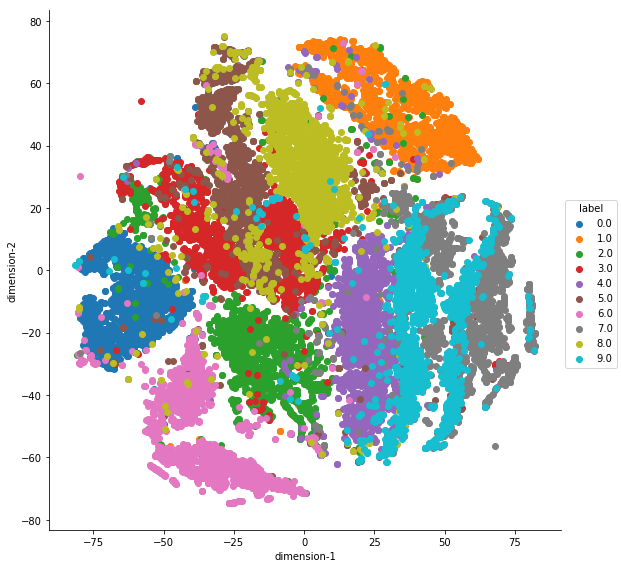

In [36]:
model = TSNE(n_components=2)
tsne_data = model.fit_transform(standarad_data_1)
print(tsne_data.shape)
print(label.shape)
tsne_data_model = np.vstack((tsne_data.T,label)).T
print(tsne_data_model.shape)
tsne_model_df = pd.DataFrame(data=tsne_data_model,columns=('dimension-1','dimension-2','label'))
s.FacetGrid(tsne_model_df,hue='label',size=8).map(mp.scatter,'dimension-1','dimension-2').add_legend()
mp.show()

Note:
    
    ->We have to try this same model for different perplexity values and number of iterations
    
    ->Getting the best from t-SNE mean that by analyzing multiple graphs with different perplexity values
    







t-SNE with perplexity of 20

(20000, 3)


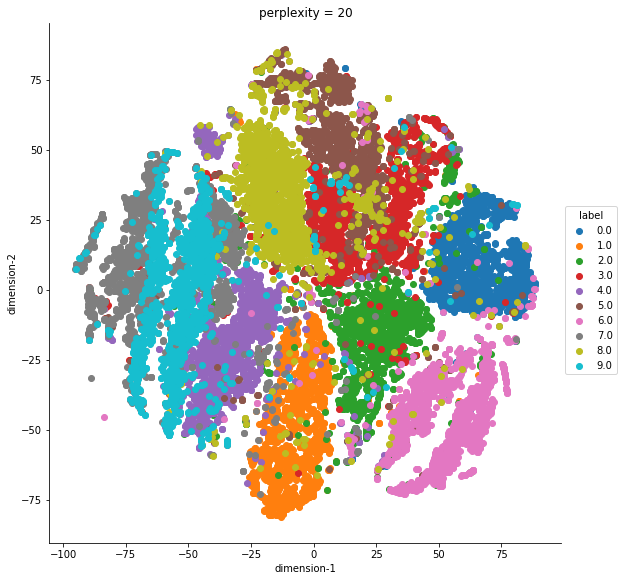

In [37]:
model = TSNE(n_components=2,random_state=998,perplexity=20)
tsne_model = model.fit_transform(standarad_data_1)
tsne_model = np.vstack((tsne_model.T,label)).T
print(tsne_model.shape)
tsne_model_df = pd.DataFrame(data=tsne_model,columns=('dimension-1','dimension-2','label'))
s.FacetGrid(tsne_model_df,hue='label',size=8).map(mp.scatter,'dimension-1','dimension-2').add_legend()
mp.title('perplexity = 20')
mp.show()






t-SNE with perplexity of 50 

(20000, 3)


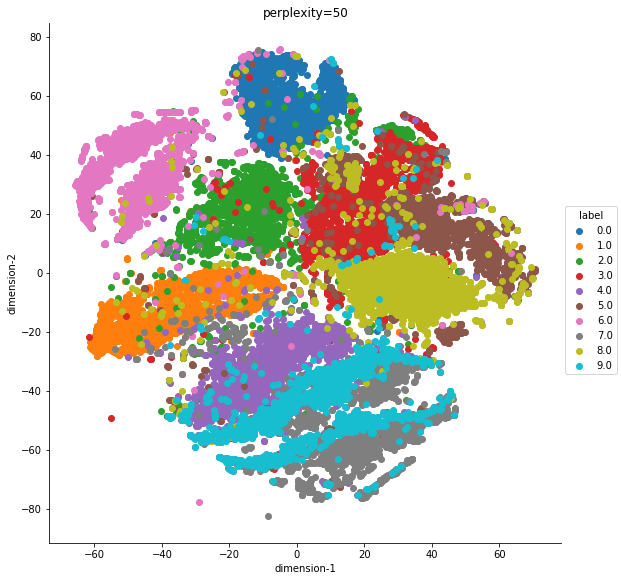

In [38]:
model = TSNE(n_components=2,random_state=997,perplexity=50)
tsne_model = model.fit_transform(standarad_data_1)
tsne_model = np.vstack((tsne_model.T,label)).T
print(tsne_model.shape)
tsne_model_df = pd.DataFrame(data=tsne_model,columns=('dimension-1','dimension-2','label'))
s.FacetGrid(tsne_model_df,hue='label',size=8).map(mp.scatter,'dimension-1','dimension-2').add_legend()
mp.title("perplexity=50")
mp.show()

t-SNE with perplexity 50 and number of iterations as 2000

(20000, 3)


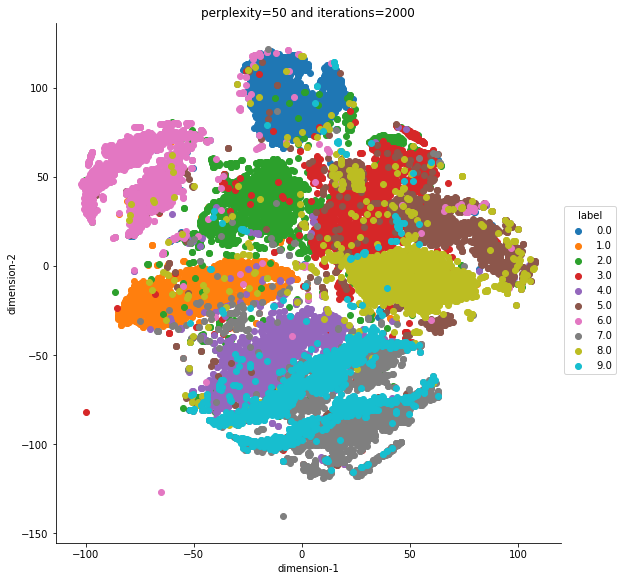

In [39]:
model = TSNE(n_components=2,random_state=997,perplexity=50,n_iter=2000)
tsne_model = model.fit_transform(standarad_data_1)
tsne_model = np.vstack((tsne_model.T,label)).T
print(tsne_model.shape)
tsne_model_df = pd.DataFrame(data=tsne_model,columns=('dimension-1','dimension-2','label'))
s.FacetGrid(tsne_model_df,hue='label',size=8).map(mp.scatter,'dimension-1','dimension-2').add_legend()
mp.title("perplexity=50 and iterations=2000")
mp.show()

Conclusion:
    
    -> PCA will tries to preserve the global shape of the data 
    
    -> t-SNE will tries to preserve the local shape of the data and it tries to preserve the 
       global shape of the data
    
    -> t-SNE tries to embed the points from high dimensionality to low dimesnionality by 
       preserving the distance of local clusters